# 05. PCA

## (1) 데이터 로드

In [1]:
# pandas 로 heart.csv 데이터 로드
import pandas as pd
data = pd.read_csv('../src/heart.csv')

In [2]:
# feature columns 와 target column 분리하기
data_features = data.drop('target', axis=1)
data_target = data['target']

In [3]:
data_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [4]:
data_target

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

#### (1-1) PCA

In [5]:
# PCA 학습 하기 (K=10)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)

pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [6]:
# PCA componet 및 shape 확인하기
print(pca.components_)
print(pca.components_.shape)

[[ 0.30957429  0.07807315 -0.28561649  0.17876028  0.12798537  0.08071345
  -0.12949038 -0.41696971  0.36386912  0.42178071 -0.38010767  0.26533438
   0.21407015]
 [ 0.3982859  -0.37907583  0.27494742  0.43890862  0.36981882  0.32147582
  -0.24476033  0.09383014 -0.25861347 -0.07052708  0.06479208  0.10585787
  -0.18261906]
 [-0.07061581  0.61811299  0.19828575  0.15467426 -0.25102077  0.44710748
  -0.23847204  0.19712826 -0.05094183 -0.04417789  0.13789762  0.31928101
   0.25604786]
 [-0.053975   -0.0066039   0.40341127  0.12873571 -0.46820338  0.17694592
   0.1794498  -0.09619857 -0.12979627  0.32265337 -0.48177058 -0.21955129
  -0.35283277]
 [-0.29098082  0.04959165  0.18848065  0.24170674  0.30588133 -0.23302053
  -0.27456142  0.33395414  0.01733791  0.26036459 -0.23578287 -0.43239088
   0.41654133]
 [-0.20421764  0.01582532 -0.22827088 -0.13986337 -0.00567409  0.28094631
  -0.6322469  -0.05608802  0.31050194 -0.16516707 -0.0625403  -0.30305895
  -0.43021238]
 [-0.24972792 -0.18461

In [7]:
# PCA component 분산비율 확인하기
pca.explained_variance_ratio_

array([0.21369912, 0.11971959, 0.09238384, 0.08994039, 0.07685925,
       0.07479569, 0.06741785, 0.05907578, 0.05584142, 0.04849683])

In [8]:
# component 총합구하기
sum(pca.explained_variance_ratio_)

0.8982297753588797

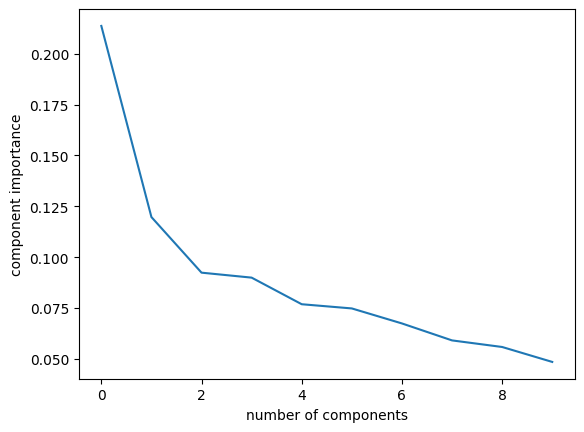

In [9]:
# 각 component 별 중요도 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('component importance')
plt.show()

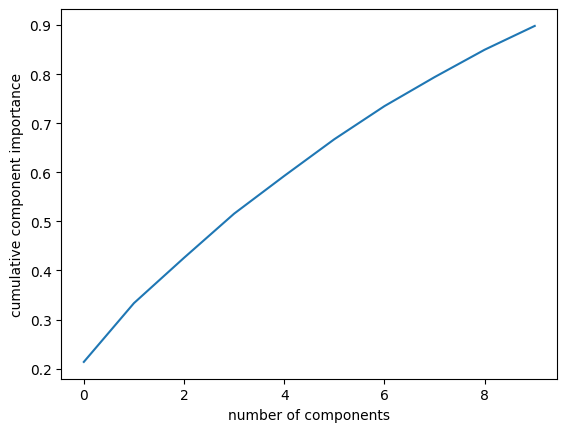

In [10]:
# component 의 중요도 높은 순으로 누적합 그래프 그리기
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative component importance')
plt.show()

In [11]:
# 원본 데이터의 features columns 를 PCA component 로 변환하기
pca_data = pca.transform(data_features)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [12]:
# PCA 변환된 데이터 확인 및 shape 확인하기
print(pca_data)
print(pca_data.shape)

[[ -3.69208681 168.83857681  -2.41863165 ...  20.79604084  43.34658691
  124.6388515 ]
 [  5.2569887  171.09054674  -0.84510721 ...   6.26542657  43.43068925
  121.79980519]
 [ 19.78997452 165.98532758  -0.56994074 ... -17.35015825  32.1305541
  107.95452398]
 ...
 [ 21.38426383 178.86871217 -30.58208386 ...  50.03512305  13.18515828
  151.72712129]
 [  1.02037083 176.81156121 -18.14461331 ...  45.88631842  29.39819387
  142.04948494]
 [ 16.17843112 153.20543528  -8.62564005 ...   5.97292272  24.86039334
  110.60726319]]
(1025, 10)


In [13]:
# 'pca_data' 와 'data_target' 를 train 과 test 비율 8:2 로 데이터를 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_data, data_target, test_size=0.20)

## 2. 모델 훈련 및 정확도 검증

#### (2-1) K-Nearest Neighbors

In [14]:
# python 'sklearn' package 를 활용하여 'K-Nearest Neighbors' 모델 정의
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
# 'knn' 모델에 x_train 학습
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# 학습한 'knn' 모델에 x_test 테스트
y_test_pred = knn.predict(x_test)
y_test_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0])

In [17]:
# x_test 결과와 y_test 비교
from sklearn.metrics import accuracy_score

score_knn_pca = round(accuracy_score(y_test_pred, y_test)*100,2)
print(score_knn_pca)

89.27


#### (2-2) Logistic Regression

In [18]:
# python 'sklearn' package 를 활용하여 Logistic Regression 모델로 학습하기
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
score_lr_pca = round(accuracy_score(y_test_pred, y_test)*100, 2)
print(score_lr_pca)

83.41


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3. PCA 하지 않은 원본 데이터에 대해 '2. 모델 훈련 및 정확도 검증' 진행하기

In [19]:
# 'data_features' 와 'data_target' 를 train 과 test 비율 8:2 로 데이터를 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.20)

In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_test_pred = knn.predict(x_test)
score_knn = round(accuracy_score(y_test_pred, y_test)*100,2)
print(score_knn)

87.32


In [21]:
# LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)
score_lr = round(accuracy_score(y_test_pred, y_test)*100, 2)
print(score_lr)

85.85


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 4. 시각화

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

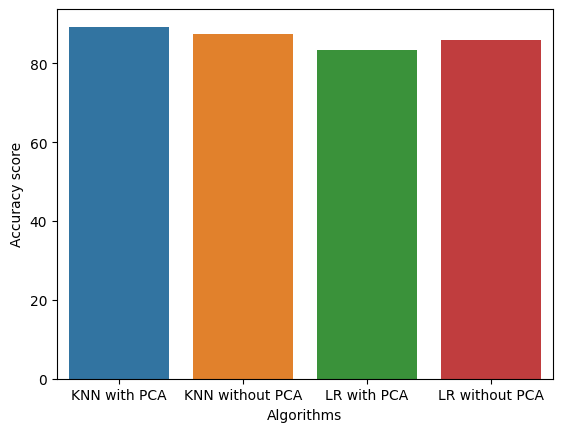

In [22]:
# 'seaborn' package 로 'PCA 적용한 KNN', 'PCA 적용하지 않은 KNN', 'PCA 적용한 Logistic Regression', 'PCA 적용하지 않은 Logistic Regression' 의 정확도를 비교하는 그래프 그리기
import seaborn as sns

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=['KNN with PCA', 'KNN without PCA', 'LR with PCA', 'LR without PCA'], y=[score_knn_pca, score_knn, score_lr_pca, score_lr])